<a href="https://colab.research.google.com/github/ankitzp8/Credit_Card_Default_Capstone_Classification/blob/main/Capstone_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# This will ignore all the warnings
import warnings
warnings.filterwarnings("ignore")

In [1]:
# # Connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# pip install --upgrade xlrd

In [4]:
# Reading the dataset
df = pd.read_excel("/content/drive/MyDrive/Credit_Card_Default_Capstone_Classification/default of credit card clients.xls",header =1)

In [ ]:
# Removing the limitations in viewing the total columns
# pd.set_option('max_columns',None)

In [ ]:
# This will show you the values of first 5 rows
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# This will show you the values of last 5 rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
# This will view the name of all columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#This will show the type of each feature present in out dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#This returns the statistical summary of the dataframe or series.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## Data Preprocessing

In [ ]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True) #Replacing the name from 0 to 1 in order to maintain the sequence

In [ ]:
# Cleaning Education
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4

In [ ]:
# Cleaning Marriage
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3

In [ ]:
# Changing the name for better readability
df.rename(columns={'PAY_1':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)


In [ ]:
# Creating Age Buckets Column
def age_buckets(x):
  if x>20 and x<=30:
    age='20-30'
  elif x>30 and x<=40:
    age= '31-40'
  elif x>40 and x<=50:
    age= '41-50'
  else:
    age= '60+'
  return age

df['age_buckets']=df['AGE'].apply(age_buckets)

## Exploratory Data Analysis

In [ ]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Text(0.5, 0, 'Default payment next month')

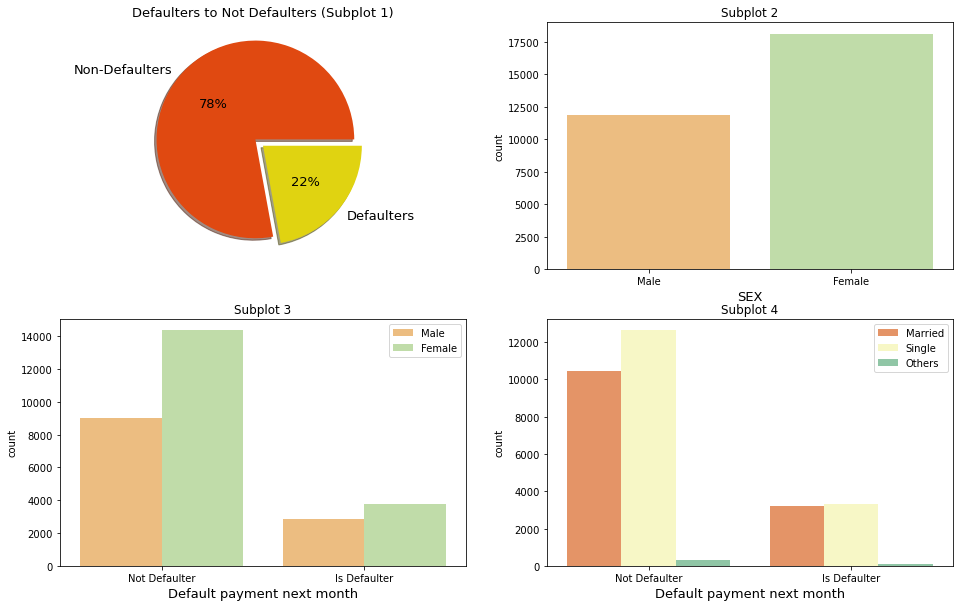

In [ ]:
# Creating a subplots
plt.figure(figsize = (16,10))
# Subplot 1
plt.subplot(221) #colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.pie(df['default payment next month'].value_counts(),radius=1, autopct='%1.0f%%',pctdistance=0.56,textprops={'fontsize': 13},labels=['Non-Defaulters','Defaulters'],explode = [0.1, 0],
        shadow=True,colors=['#E04911','#E0D311'])
plt.title('Defaulters to Not Defaulters (Subplot 1)',fontdict={'size':13})

# Subplot 2
plt.subplot(222)
sns.countplot(df['SEX'],palette ='Spectral')
plt.xticks(rotation=0,ticks=range(2),labels=['Male','Female'])
plt.title('Subplot 2')
plt.xlabel('SEX',fontdict={'size':13})
# Subplot 3
plt.subplot(223)

sns.countplot(df['default payment next month'],hue=df['SEX'],palette ='Spectral')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])
plt.legend(['Male','Female'])
plt.title('Subplot 3')
plt.xlabel('Default payment next month',fontdict={'size':13})
# Subplot 4
plt.subplot(224)

sns.countplot(df['default payment next month'],hue=df['MARRIAGE'],palette ='Spectral')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])
plt.legend(['Married','Single','Others'])
plt.title('Subplot 4')
plt.xlabel('Default payment next month',fontdict={'size':13})


* From Subplot 1 we can conclude that number of defaulter is very less than Not defaulter
* From Subplot 2 we can conculde that number of females are more than males in our dataset
* From Subplot 3  we can say that female tends to pay on time than male.
* From Subplot 4 conclusion is Married are most defaulters than singles and others

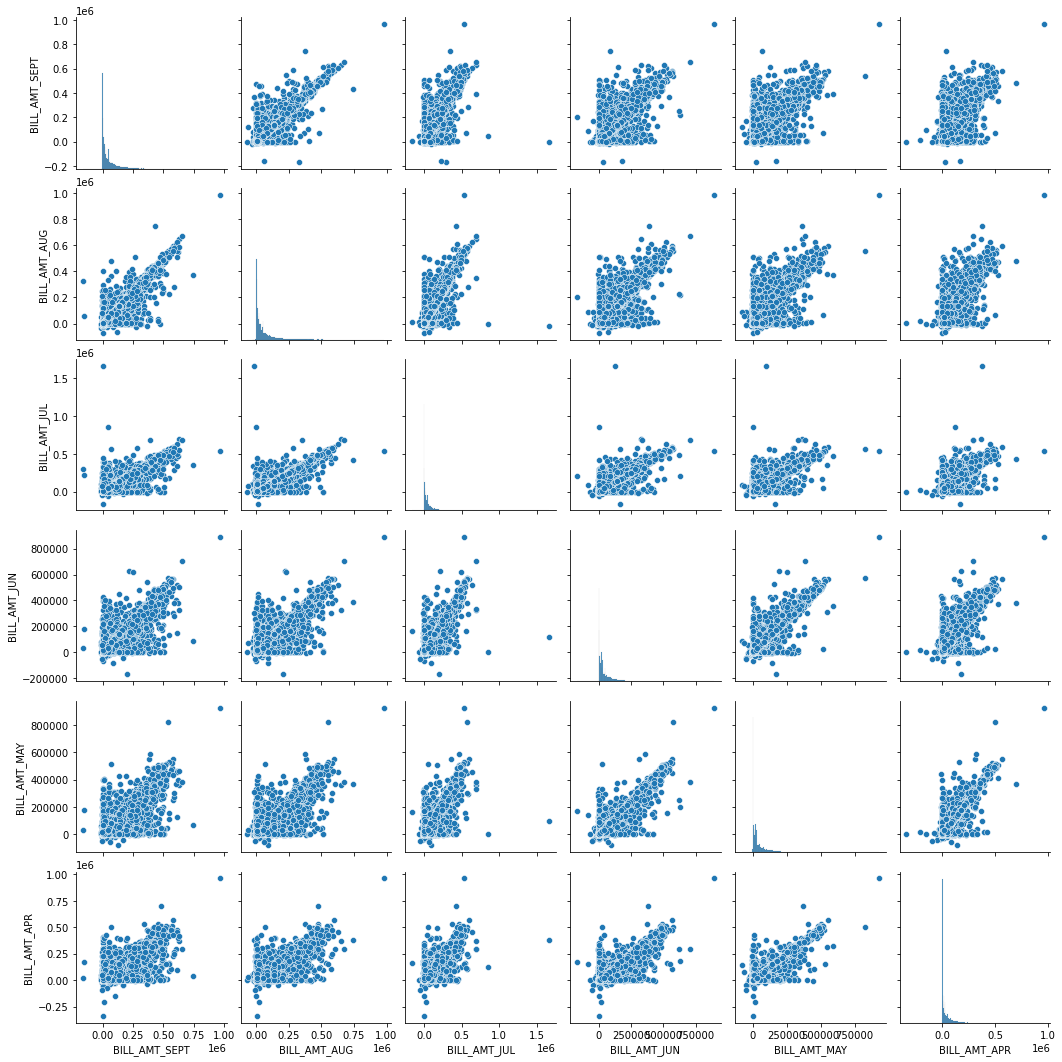

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]
sns.pairplot(data = bill_amnt_df)

Bill amount for each month is highly correlated with each other

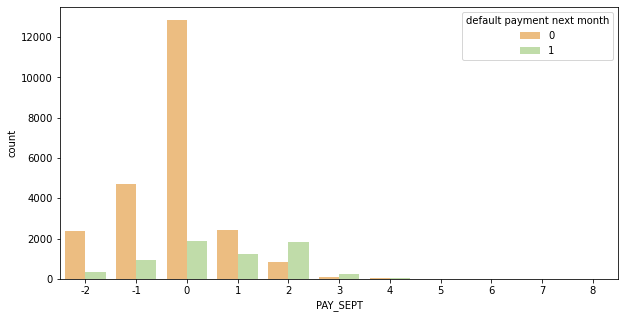

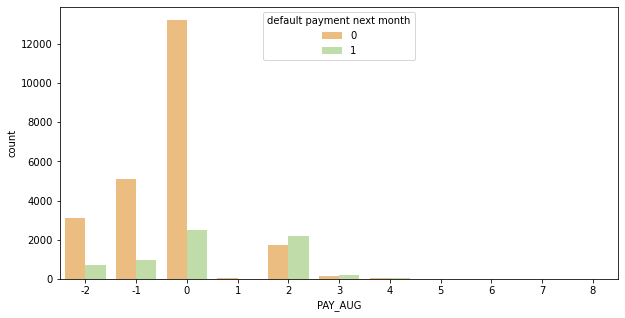

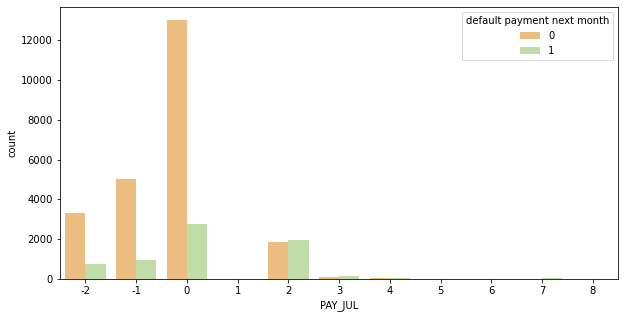

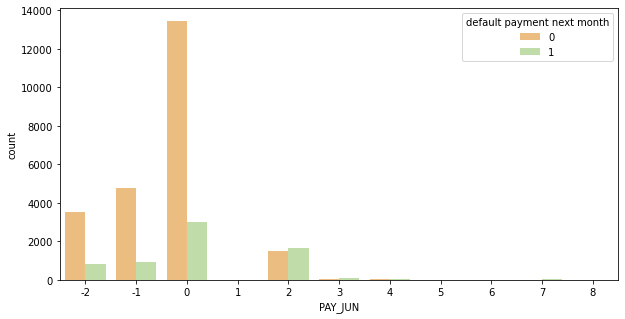

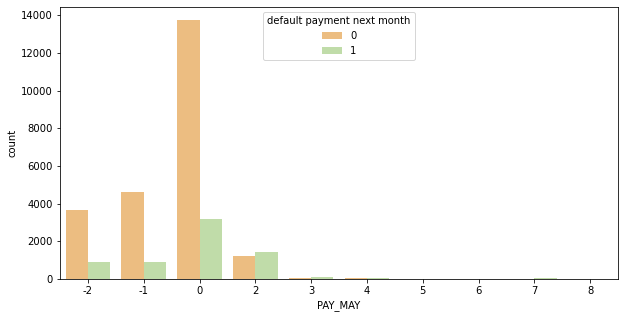

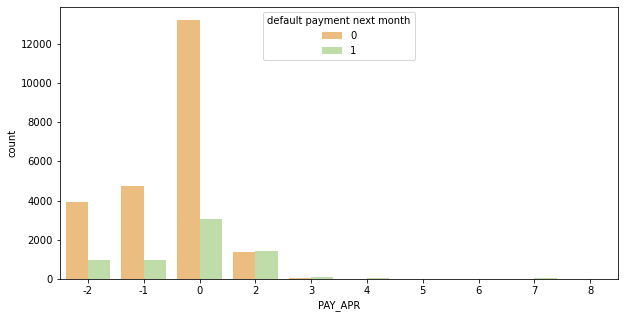

In [ ]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'default payment next month', data = df,palette ='Spectral')

This graph shows the history of bill payment

<AxesSubplot:xlabel='AGE', ylabel='LIMIT_BAL'>

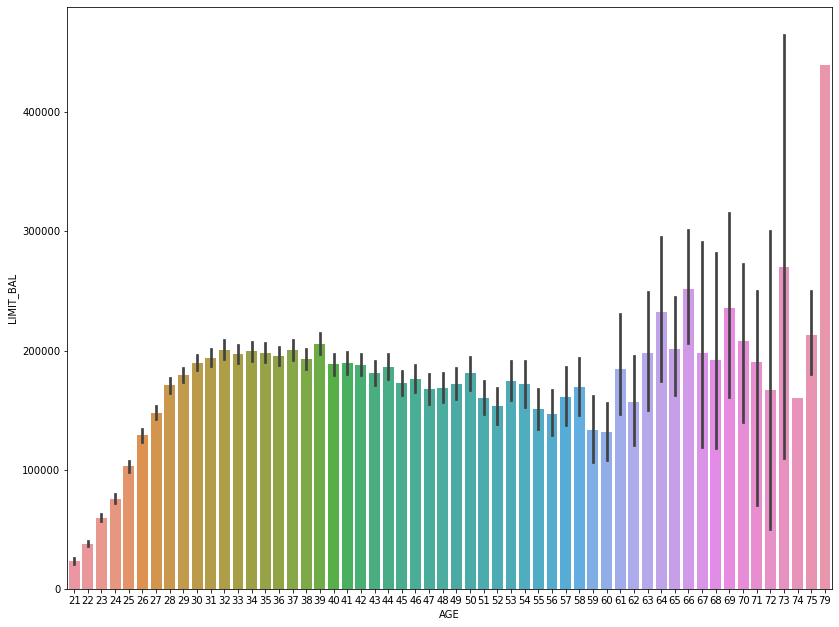

In [ ]:
fig,ax=plt.subplots()
fig.set_size_inches(13.7,10.7)
sns.barplot(df['AGE'],df['LIMIT_BAL'])

Here, we can say from age 21 to 39 limit balance is increasing however from 39 to 61 it started to decline and then from 62 to 79 it has increased drastically

## Treating multicollinearity

<AxesSubplot:>

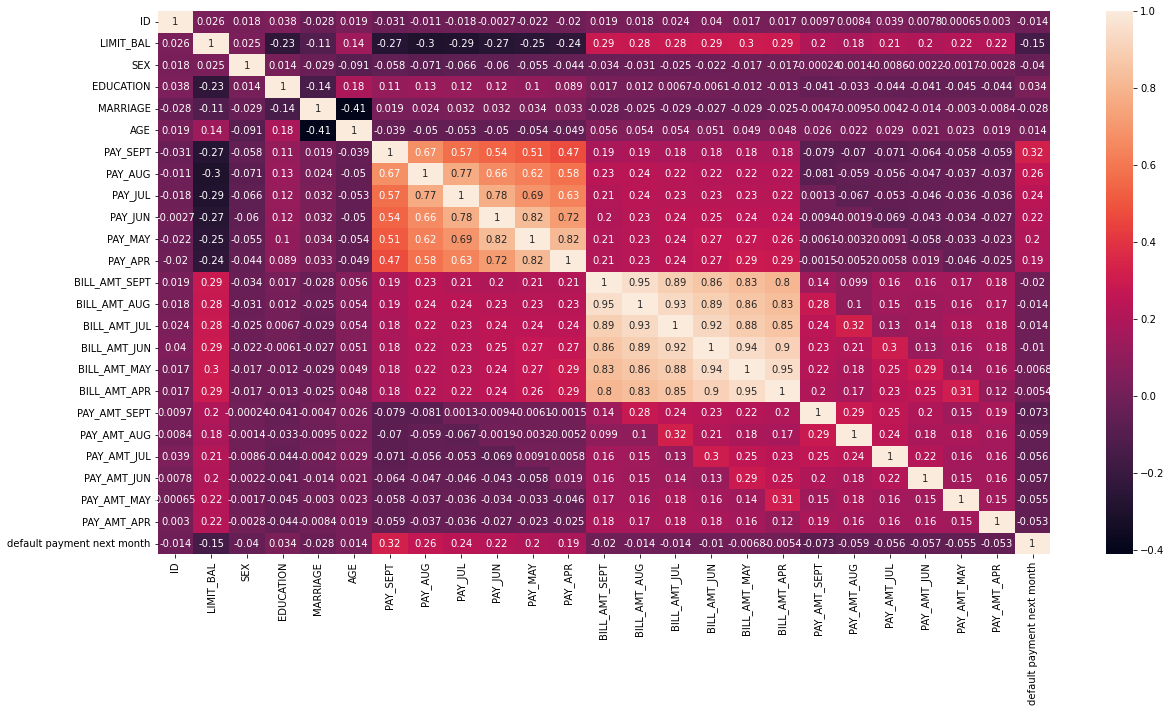

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

### Feature Engineering

In [ ]:
df_fr = df.copy()
df_fr['Payement_Value'] = df_fr['PAY_AMT_SEPT'] + df_fr['PAY_AMT_AUG'] + df_fr['PAY_AMT_JUL'] + df_fr['PAY_AMT_JUN'] + df_fr['PAY_AMT_MAY'] + df_fr['PAY_AMT_APR']

df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR'])

df_fr = df_fr.drop(['ID','BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR','age_buckets'],axis=1)

<AxesSubplot:>

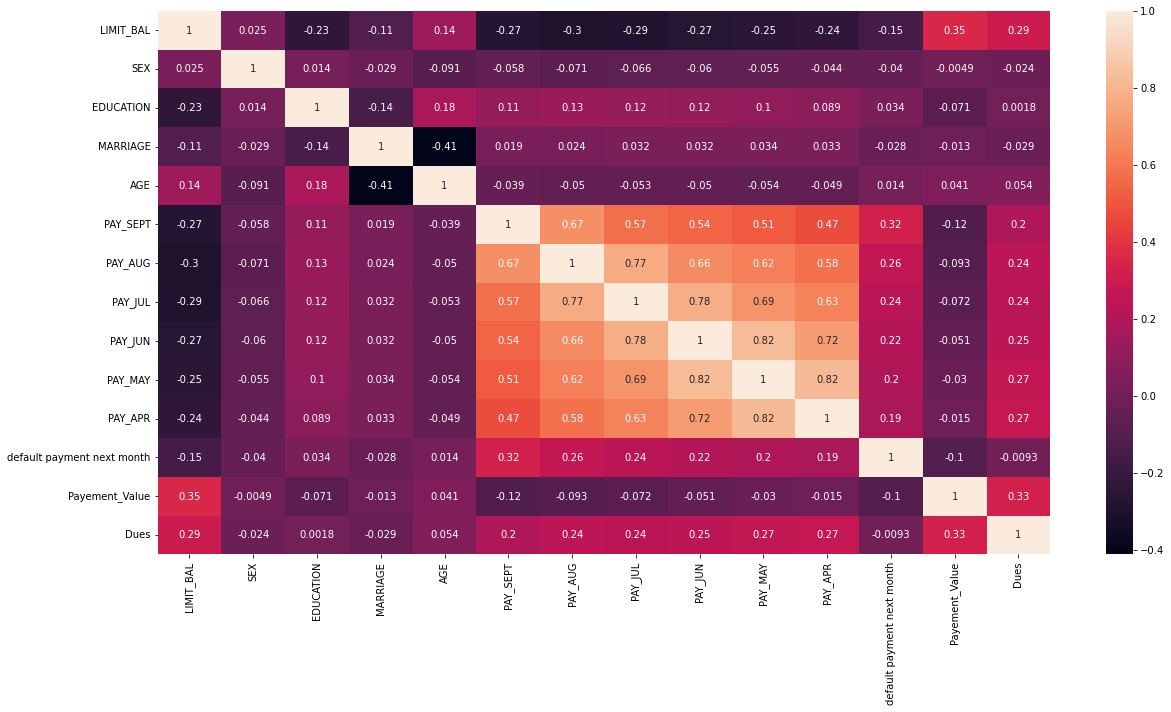

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df_fr.corr(),annot=True)

We have tried to treat all the multi-collinearity using Feature Enginerring

## One Hot Encoding

In [ ]:
df_fr = pd.get_dummies(columns = ['EDUCATION','MARRIAGE'], data = df_fr,drop_first=True)

In [ ]:
df_fr.head()

,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,default payment next month,Payement_Value,Dues,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000,2,24,2,2,-1,-1,-2,-2,1,689,4602,1,0,0,0,0
1,120000,2,26,-1,2,0,0,0,2,1,5000,13352,1,0,0,1,0
2,90000,2,34,0,0,0,0,0,0,0,11018,82626,1,0,0,1,0
3,50000,2,37,0,0,0,0,0,0,0,8388,182101,1,0,0,0,0
4,50000,1,57,-1,0,-1,0,0,0,0,59049,102990,1,0,0,0,0


### Splitting the dataset

In [ ]:
x = df_fr.drop('default payment next month',axis=1)
y = df_fr['default payment next month']

([<matplotlib.axis.XTick at 0x2190425f220>,
 [Text(0, 0, 'Not Defaulter'), Text(1, 0, 'Is Defaulter')])

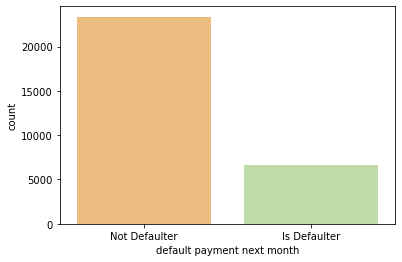

In [ ]:
sns.countplot(y,palette ='Spectral')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])

### Handling Data Imbalance

In [ ]:
#SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
SMOTE = SMOTE()
X_sm, Y_sm = SMOTE.fit_resample(x,y)
# summarize the new class distribution
Y_sm.value_counts()

1    23364
0    23364
Name: default payment next month, dtype: int64

([<matplotlib.axis.XTick at 0x21904525ca0>,
 [Text(0, 0, 'Not Defaulter'), Text(1, 0, 'Is Defaulter')])

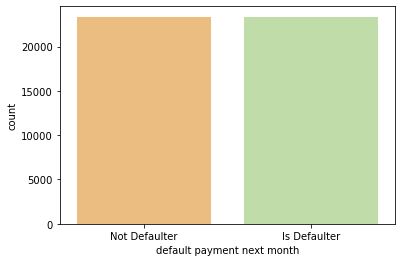

In [ ]:
sns.countplot(Y_sm,palette ='Spectral')
plt.xticks(rotation=0,ticks=range(2),labels=['Not Defaulter','Is Defaulter'])

# Train-Test Split

In [ ]:
from sklearn import model_selection
x_train,x_test,y_train,y_test = model_selection.train_test_split(X_sm,Y_sm,test_size=0.2)

## Implementing Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import xgboost as xgb

from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,roc_auc_score,classification_report,recall_score,f1_score

D:\Coding\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Logistic Regression

In [ ]:
logistic = LogisticRegression(max_iter=200,random_state=42)
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

<AxesSubplot:>

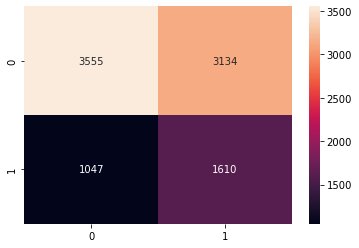

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(precision_score(y_pred,y_test),recall_score(y_pred,y_test),accuracy_score(y_pred,y_test),f1_score(y_pred,y_test),roc_auc_score(y_pred,y_test))

0.3393760539629005 0.605946556266466 0.5526428418574791 0.4350763410349953 0.5687080665918965


## Support Vector Classifier

In [ ]:
svc =SVC(random_state=42)
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

<AxesSubplot:>

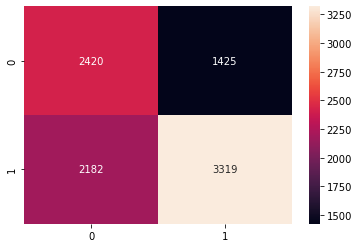

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.6033448463915652 0.6996205733558178 0.6140594906912048 0.6479258174719374 0.612739447912155


## Decision Tree Classifier

In [ ]:
clf_tree = DecisionTreeClassifier(random_state=42)
clf_tree.fit(x_train,y_train)
y_pred = clf_tree.predict(x_test)

<AxesSubplot:>

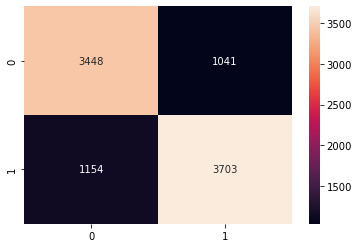

In [ ]:
cm = confusion_matrix(y_pred,y_test)
sns.heatmap(cm, annot=True,fmt='d')

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.7624047766110768 0.7805649241146712 0.7651401669163278 0.7713779814602645 0.7649021926092696


## Random Forest Classifier

In [ ]:
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.8567328918322296 0.8180860033726813 0.8382195591696983 0.8369635540219971 0.8385301811735202


## XGBoost

In [ ]:
xgb_clf=xgb.XGBClassifier(max_depth=5,learning_rate=0.3,n_jobs=-1,random_state=42)
xgb_clf.fit(x_train,y_train)
y_pred = xgb_clf.predict(x_test)

[18:08:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

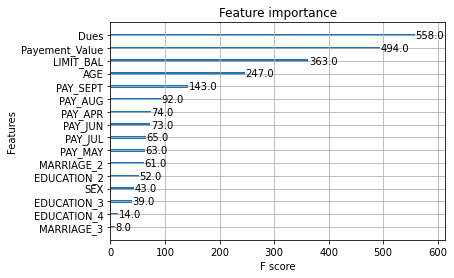

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.8445164275798241 0.7693929173693086 0.8110421570725445 0.8052062651665564 0.8116847246559712


# HyperParameter Tuning

## Logistic Regression

In [ ]:
parameters = {'penalty':['l1','l2','elasticnet','none'],'C':list(np.linspace(0,1,11)),'max_iter':list(range(50,500,50))}
logistic_GCV = LogisticRegression(random_state=42)
logistic_GCV=GridSearchCV(logistic_GCV,parameters,n_jobs=-1,scoring='precision')
logistic_GCV.fit(x_train,y_train)
y_pred = logistic_GCV.predict(x_test)

In [ ]:
print(precision_score(y_pred,y_test),recall_score(y_pred,y_test),accuracy_score(y_pred,y_test),f1_score(y_pred,y_test),roc_auc_score(y_pred,y_test))

0.356915907646685 0.6080837242872609 0.5589557029745346 0.44981313400961026 0.5731673374288015


In [ ]:
logistic_GCV.best_params_

{'C': 0.0, 'max_iter': 50, 'penalty': 'none'}

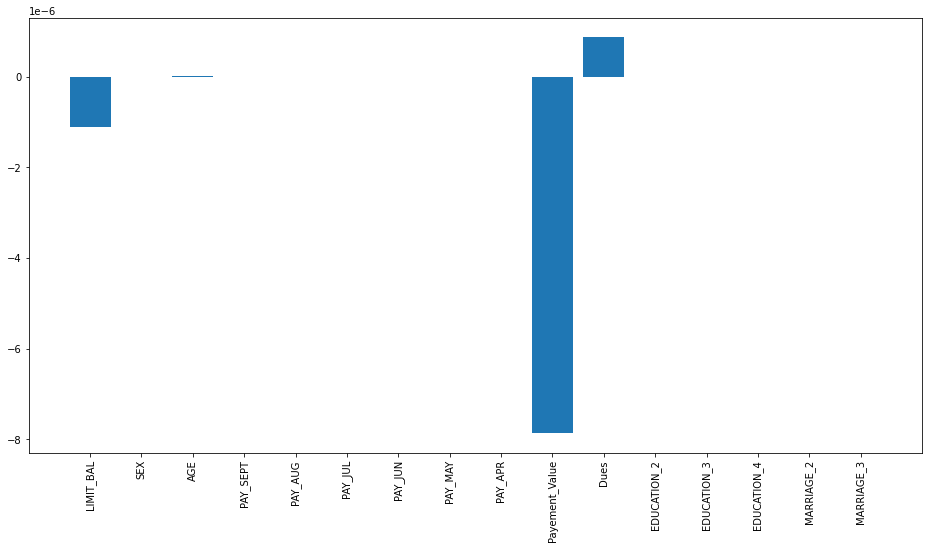

In [ ]:
model=logistic_GCV.best_estimator_
# get importance
importance = model.coef_[0]
# plot feature importance
plt.figure(figsize=(16,8))
plt.bar(range(len(importance)),importance)
plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90)
plt.show()

In [ ]:
log_prec=precision_score(y_pred,y_test)
log_rec=recall_score(y_pred,y_test)
log_acc=accuracy_score(y_pred,y_test)
log_f1=f1_score(y_pred,y_test)
log_roc=roc_auc_score(y_pred,y_test)

## Support Vector Classifier

In [ ]:
parameters = {'C':list(np.linspace(0,1,11))}
SVC_GCV = SVC(random_state=42)
SVC_GCV=GridSearchCV(SVC_GCV,parameters,n_jobs=-1,scoring='precision')
SVC_GCV.fit(x_train,y_train)
y_pred = SVC_GCV.predict(x_test)

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.6023651145602366 0.6871838111298483 0.610956558955703 0.641985033477747 0.6097805192111649


In [ ]:
SVC_GCV.best_params_

{'C': 0.5}

In [ ]:
svc_prec=precision_score(y_pred,y_test)
svc_rec=recall_score(y_pred,y_test)
svc_acc=accuracy_score(y_pred,y_test)
svc_f1=f1_score(y_pred,y_test)
svc_roc=roc_auc_score(y_pred,y_test)

## Decision Tree Classifier

In [ ]:
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}
dtc_GCV = DecisionTreeClassifier(random_state=42)
dtc_GCV=GridSearchCV(dtc_GCV,parameters,n_jobs=-1,scoring='precision')
dtc_GCV.fit(x_train,y_train)
y_pred = dtc_GCV.predict(x_test)

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.7882613510520488 0.7502107925801011 0.7709180398031243 0.7687655254347122 0.7712375127611502


In [ ]:
dtc_GCV.best_params_

{'min_samples_leaf': 8, 'min_samples_split': 2}

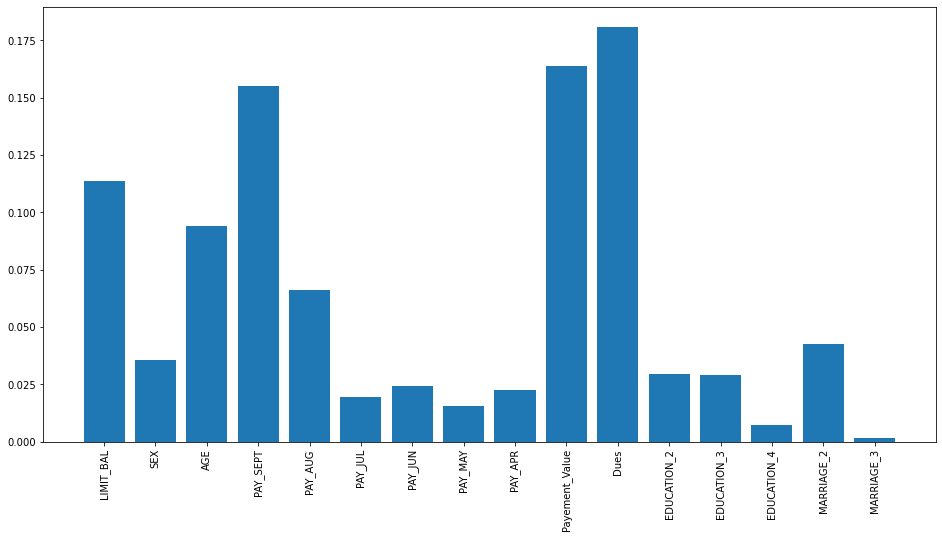

In [ ]:
model=dtc_GCV.best_estimator_
# get importance
importance = dec_tree.feature_importances_
plt.figure(figsize=(16,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90)
plt.show()

In [ ]:
dtc_prec=precision_score(y_pred,y_test)
dtc_rec=recall_score(y_pred,y_test)
dtc_acc=accuracy_score(y_pred,y_test)
dtc_f1=f1_score(y_pred,y_test)
dtc_roc=roc_auc_score(y_pred,y_test)

## Random Forest Classifier

In [ ]:
parameters = {'min_samples_split':range(1,10),'min_samples_leaf':range(1,10)}
rfc_GCV = RandomForestClassifier(random_state=42)
rfc_GCV=GridSearchCV(rfc_GCV,parameters,n_jobs=-1,scoring='precision')
rfc_GCV.fit(x_train,y_train)
y_pred = rfc_GCV.predict(x_test)

In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.8567328918322296 0.8180860033726813 0.8382195591696983 0.8369635540219971 0.8385301811735202


In [ ]:
rfc_GCV.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

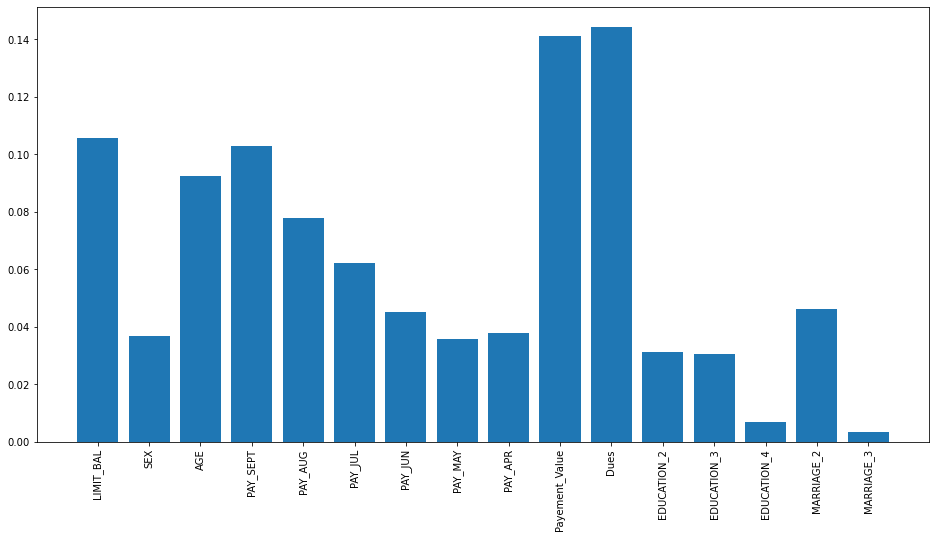

In [ ]:
model=rfc_GCV.best_estimator_
importance = model.feature_importances_
plt.figure(figsize=(16,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90)
plt.show()

In [ ]:
rfc_prec=precision_score(y_pred,y_test)
rfc_rec=recall_score(y_pred,y_test)
rfc_acc=accuracy_score(y_pred,y_test)
rfc_f1=f1_score(y_pred,y_test)
rfc_roc=roc_auc_score(y_pred,y_test)

## XGBoost

In [ ]:
parameters = {'learning_rate':list(np.linspace(0,1,11))}
xgb_GCV = xgb.XGBClassifier(random_state=42)
xgb_GCV=GridSearchCV(xgb_GCV,parameters,n_jobs=-1,scoring='precision')
xgb_GCV.fit(x_train,y_train)
y_pred = xgb_GCV.predict(x_test)

[18:55:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
print(precision_score(y_test,y_pred),recall_score(y_test,y_pred),accuracy_score(y_test,y_pred),f1_score(y_test,y_pred),roc_auc_score(y_test,y_pred))

0.8412366341236635 0.7665748782037703 0.8090092017975604 0.8021722265321956 0.8094496012640474


In [ ]:
xgb_GCV.best_params_

{'learning_rate': 0.30000000000000004}

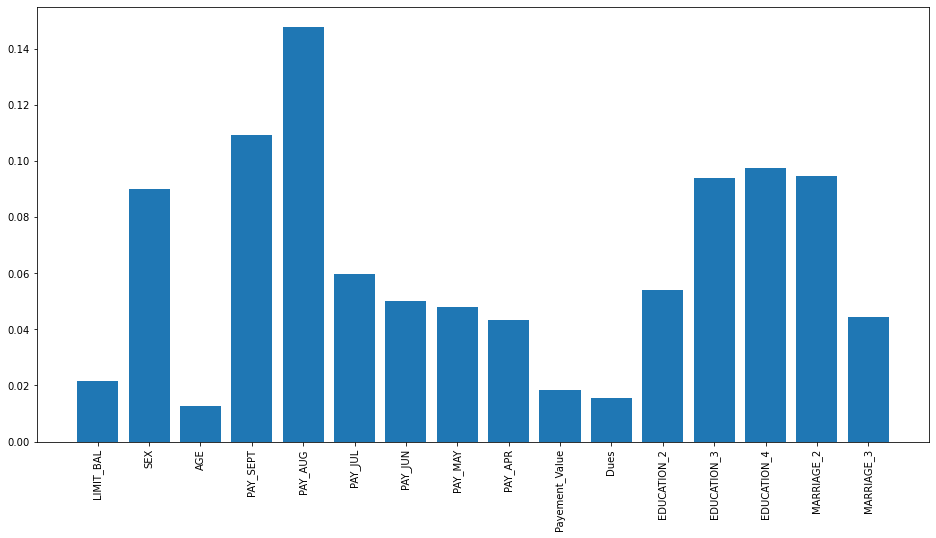

In [ ]:
model=xgb_GCV.best_estimator_
importance = model.feature_importances_
plt.figure(figsize=(16,8))
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(0,len(x.columns)),labels=x.columns,rotation=90)
plt.show()

In [ ]:
xgb_prec=precision_score(y_pred,y_test)
xgb_rec=recall_score(y_pred,y_test)
xgb_acc=accuracy_score(y_pred,y_test)
xgb_f1=f1_score(y_pred,y_test)
xgb_roc=roc_auc_score(y_pred,y_test)

In [ ]:
precision=[]
recall=[]
accuracy=[]
f1=[]
roc=[]
x=['Logarithmic','Support Vector Machines','Decision Tree','Random Forest','XGBoosting']
precision.extend([log_prec,svc_prec,dtc_prec,rfc_prec,xgb_prec])
recall.extend([log_rec,svc_rec,dtc_rec,rfc_rec,xgb_rec])
accuracy.extend([log_acc,svc_acc,dtc_acc,rfc_acc,xgb_acc])
f1.extend([log_f1,svc_f1,dtc_f1,rfc_f1,xgb_f1])
roc.extend([log_roc,svc_roc,dtc_roc,rfc_roc,xgb_roc])
precision=[int(i*100) for i in precision]
recall=[int(i*100) for i in recall]
accuracy=[int(i*100) for i in accuracy]
f1=[int(i*100) for i in f1]
roc=[int(i*100) for i in roc]

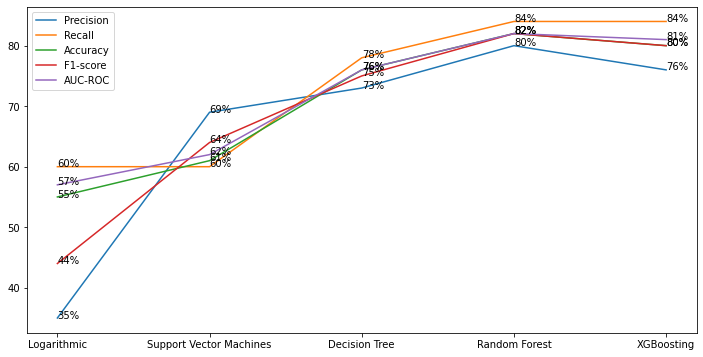

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(x,precision, label = "Precision")
for a,b in zip(x, precision):
    plt.text(a, b, str(b)+'%')
plt.plot(x,recall, label = "Recall")
for a,b in zip(x, recall):
    plt.text(a, b, str(b)+'%')
plt.plot(x,accuracy, label = "Accuracy")
for a,b in zip(x, accuracy):
    plt.text(a, b, str(b)+'%')
plt.plot(x,f1, label = "F1-score")
for a,b in zip(x, f1):
    plt.text(a, b, str(b)+'%')
plt.plot(x,roc,label='AUC-ROC')
for a,b in zip(x, roc):
    plt.text(a, b, str(b)+'%')
plt.legend()
plt.show()

# Conclusion



*   In our dataset, We used many algorithm like Logistic Regression,Support vector classsifier,decision tree classifier,XGBoost Classifier,Random Forest Classifier. Below are the best algorithm for the respective metrics.

1. **Random Forest Classifier** has the best value of accuracy score of **84%**
2. **Random Forest Classifier** has the best value of precision score of **84%**
3. **Random Forest Classifier** has the best value of recall score of **82%**
4. **Random Forest Classifier** has the best value of f1 score of **84%**
5. **Random Forest Classifier** has the best value of Roc_auc score of **84%**

This proves **Random Forest Classifier algorithm** has perfectly fitted all the dataset.





